# Sprint 機械学習スクラッチ　線形回帰

In [1]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # testとtrain分割

# データの読み込み
df = pd.read_csv('./train.csv')
X = df.loc[:,['GrLivArea','YearBuilt']].values
y = df.SalePrice.values

# データの前処理
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
# 標準化
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test -X_test.mean()) / X_test.std()
y_train_std = (y_train - y_train.mean()) / y_train.std()
y_test_std = (y_test - y_test.mean()) / y_test.std()

### 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

In [2]:
def _linear_hypothesis(X, theta_array):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    theta_array : 次の形のndarray, shape(n_samples, 1)
     パラメータベクトル

    Returns
    -------
      Y:次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    # 仮定関数
    Y = np.dot(X,theta_array)
    return Y


In [3]:
#仮データを作成（HousePrise）
# バイアス項の追加
X_1 = np.insert(X_test_std, 0, 1, axis=1)
# シータの初期値
coef = np.random.rand(X_1.shape[1])
# パラメータ
lr = 0.001

# shapeの確認
print('X_1_shape :',X_1.shape)
print('coef_shape： 　',coef.shape)

X_1_shape : (365, 3)
coef_shape： 　 (3,)


In [4]:
hypothesis = _linear_hypothesis(X_1,coef)
print('hypothesis_shape：',hypothesis.shape,'\n')
print(hypothesis[:10])

hypothesis_shape： (365,) 

[0.4512232  0.29614398 0.25713514 0.41216549 0.27303397 0.17193245
 0.37897929 0.26174752 0.78403466 0.32382807]


### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください

In [5]:
def _gradient_descent(X,error,lr,coef):
    """
    最急降下法によるパラメータの更新．

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
    データの特徴量
    error : 次の形のndarray, shape (n_samples,)
    
    Returns
    -------
      次の形のndarray, shape (n_features,)
      線形回帰式の切片と重み

    """
    coef = coef - lr/len(X) * np.dot(error,X)
    return coef

In [6]:
# 仮データで予測値と実測値の差（error)を確認
error = (_linear_hypothesis(X_1,coef)) - y_test_std
print('error_shape：',error.shape)
print("error",error[:10])

error_shape： (365,)
error [ 0.21567671  0.89287055  1.13693103  0.28275769  1.42359183  1.3594124
 -0.86943848  0.76001519 -6.15134436  0.72609832]


### 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 hθ(x)の出力が推定結果です。

In [7]:
def predict(X,theta_array):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    y_pred = np.dot(X,theta_array).reshape(-1,1)
    return y_pred

In [8]:
#仮データで確認
y_pred = predict(X_1,coef)
print('y_pred_shape：',y_pred.shape)
print('y_test_shape：',y_test_std.shape)
print('\npredict：\n',y_pred[:10])


y_pred_shape： (365, 1)
y_test_shape： (365,)

predict：
 [[0.4512232 ]
 [0.29614398]
 [0.25713514]
 [0.41216549]
 [0.27303397]
 [0.17193245]
 [0.37897929]
 [0.26174752]
 [0.78403466]
 [0.32382807]]


### 【問題4】平均二乗誤差

In [9]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = (np.mean((y_pred - y)**2))
    
    return mse

print("MSE:", MSE(y_pred, y_train_std))

MSE: 1.1193429939353083


### 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。
目的関数（損失関数） J(θ)は次の式です。

In [10]:
#mse = MSE(y_pred,y_test_std)/2

#問題６のクラス内に実装(128行、１６３行)

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。
scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [11]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

        
    def _linear_hypothesis(self,X,coef):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        hypothesis = np.dot(X,coef)
        return hypothesis
    
    
    def _gradient_descent(self,X,coef,error):
        """
        最急降下法によるパラメータの更新．

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        データの特徴量
        error : 次の形のndarray, shape (n_samples,)
        """
        coef = coef - self.lr/len(X) * np.dot(error,X)
        return coef
    
    
    def MSE(self,y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        mse = np.mean((y_pred - y)**2)
        return mse

    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        # trainデータ
        #バイアス項を入れる場合はXの０列目に１を挿入する
        if self.bias is False:
            X_new = np.insert(X, 0, 1, axis=1)
        #バイアス項を入れない場合はXの０列目に０を挿入する
        else:
            X_new = np.insert(X, 0, 0, axis=1)

        # シータの初期化
        self.coef_ = np.random.rand(X_new.shape[1])
        # num_iter回更新
        for i in range(self.iter):
            # 仮定関数
            hypothesis = self._linear_hypothesis(X_new,self.coef_)
            
            # 予測と実測値との誤差
            error = hypothesis - y
            
            # 最急降下法
            self.coef_ = self._gradient_descent(X_new,self.coef_,error)
            
            # lossを記録 （【問題５】目的関数の実装箇所）
            self.loss[i] = self.MSE(self._linear_hypothesis(X_new,self.coef_),y)/2
        
            # 学習過程の出力
            if self.verbose is True:
                map_result = map(str, self.loss)
                result = ',\n'.join(map_result)                
                print('Train Data Loss Iteration{0}: \n{1}'.format(self.iter,result))
            else:
                pass

        
        
        # 検証用データがある場合
        if X_val is not None:
            #バイアス項を入れる場合はXの０列目に１を挿入する
            if self.bias is False:
                X_val_new = np.insert(X_val, 0, 1, axis=1)
            #バイアス項を入れない場合、0を挿入する
            else:
                X_val_new = np.insert(X_val, 0, 0, axis=1)
                
        # シータの初期化
        self.coef_val_ = np.random.rand(X_val_new.shape[1])
        # num_iter回更新
        for i in range(self.iter):
            # 仮定関数
            hypothesis_val = self._linear_hypothesis(X_val_new,self.coef_val_)
            
            # 予測と実測値との誤差
            error_val = hypothesis_val - y_val
            
            # 最急降下法
            self.coef_val_ = self._gradient_descent(X_val_new,self.coef_val_,error_val)
            
            # lossを記録　 （【問題５】目的関数の実装箇所）
            self.val_loss[i] = self.MSE(self._linear_hypothesis(X_val_new,self.coef_val_),y_val)/2
        
            # 学習過程の出力
            if self.verbose is True:
                map_result_val = map(str, self.val_loss)
                result_val = ',\n'.join(map_result_val)                
                print('\nTest Data Loss Iteration{0}: \n{1}'.format(self.iter,result_val))
            else:
                pass

            
    def predict(self,X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
        """
        #バイアス項を入れる場合はXの０列目に１を挿入する
        if self.bias is False:
            X_add = np.insert(X, 0, 1, axis=1)
        #バイアス項を入れない場合、0を挿入する
        else:
            X_add = np.insert(X, 0, 0, axis=1)
            
        y_pred = np.dot(X_add,self.coef_).reshape(-1,1)
        return y_pred

In [12]:
# 初期化，学習
slr=ScratchLinearRegression(num_iter=5000, lr=0.001, bias=False ,verbose=False)
slr.fit(X=X_train_std, y=y_train_std, X_val=X_test_std, y_val=y_test_std)

In [13]:
# 推定
y_pred_train = slr.predict(X_train_std)
y_pred = slr.predict(X_test_std)
print('y_pred:\n',y_pred[:10])

y_pred:
 [[ 1.33989710e+00]
 [ 9.00106658e-02]
 [-3.96774481e-01]
 [ 7.07061744e-01]
 [-5.24868613e-01]
 [-6.70410180e-01]
 [-2.78759648e-03]
 [-1.81241299e-01]
 [ 3.96053148e+00]
 [-4.82892826e-01]]


In [14]:
print('Train_MSE：',slr.MSE(y_pred_train,y_train_std))
print('Test_MSE：',slr.MSE(y_pred,y_test_std))
print('切片：',slr.coef_[0])
print('係数：',slr.coef_[1:])

Train_MSE： 1.532636986644203
Test_MSE： 1.536583533200892
切片： 0.11783911168929005
係数： [0.60181832 0.39798896]


## SKlean　LinearRegressionと比較

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# 初期化，学習，推定
model = LinearRegression()
model.fit(X_train_std,y_train_std)
y_train_pred_sk = model.predict(X_train_std)
y_pred_sk = model.predict(X_test_std)

print('Train_MSE：',mean_squared_error(y_train_std,y_train_pred_sk))
print('Test_MSE：',mean_squared_error(y_test_std,y_pred_sk))
print('切片：',model.intercept_)
print('係数：',model.coef_)

Train_MSE： 0.3230340002216025
Test_MSE： 0.41002698832759593
切片： -2.690696506883759
係数： [0.53730804 5.67444994]


## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

<function matplotlib.pyplot.show(*args, **kw)>

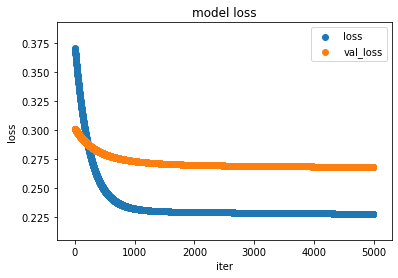

In [16]:
plt.scatter(np.array(range(slr.iter)), slr.loss, label="loss")
plt.scatter(np.array(range(slr.iter)), slr.val_loss, label="val_loss")

plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()

plt.show